<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_9_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Anomaly Detection**

Anomaly Detection is the technique of identifying rare events or observations which can raise suspicions by being statistically different from the rest of the observations. Such “anomalous” behaviour typically translates to some kind of a problem like a credit card fraud, failing machine in a server, a cyber attack, etc.



**Anomaly Detection on a synthetic dataset using the K-Nearest Neighbors algorithm**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

# Load Breast Cancer dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Isolation Forest model
clf = IForest(contamination=0.1, random_state=42)

# Train the model on the training data
clf.fit(X_train)

# Predict the anomaly scores on the test set
y_scores = clf.decision_function(X_test)



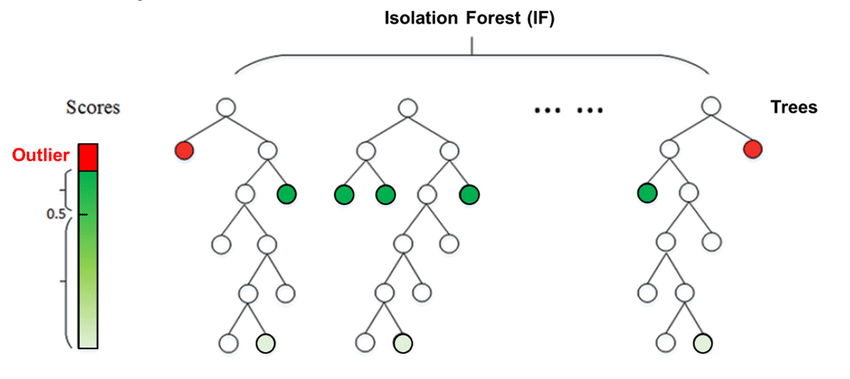

Training Data (X_train):

Inliers: Instances representing normal patterns.

Outliers: Instances deviating from the normal patterns.
Isolation Forest Model Training:

The model learns to create isolation trees to isolate instances, making it effective at identifying outliers.
Test Data (X_test):

The model predicts anomaly scores for each instance in the test set.
Anomaly Scores:

Higher anomaly scores indicate a higher likelihood of being an outlier.

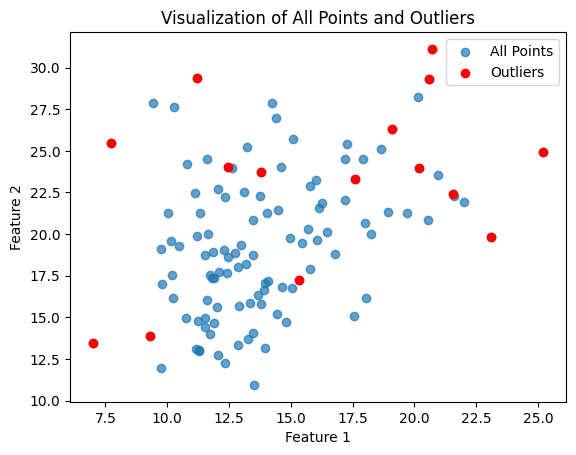

In [22]:
threshold = 0  # You can adjust this threshold based on your needs
anomaly_points = X_test[y_scores > threshold]

# Plotting all points
plt.scatter(X_test[:, 0], X_test[:, 1], label='All Points', alpha=0.7)

# Plotting outliers in a different color
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], label='Outliers', color='red')

plt.title("Visualization of All Points and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()